# S&P Notebook

## Introduction
  * Supervised Learning Stock Prediction

# Notebook Setup and Data Import

dataStartDate = 1950-01-01 00:00:00
test_st = 1990-01-01 00:00:00
test_et = 2017-04-28 00:00:00


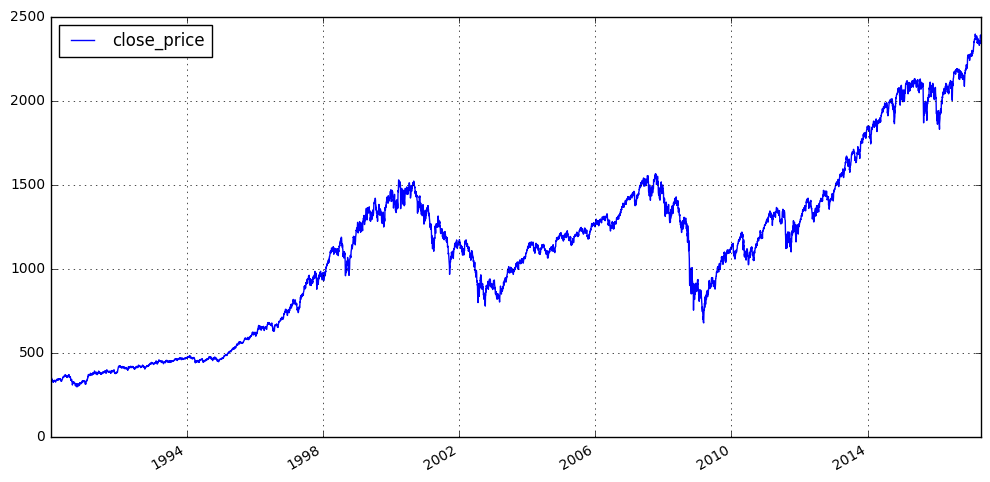

In [276]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline
%run algosciquant2

# Paramters
ticker = "^GSPC"
dataStartDate=dt.datetime(1950,1,1)
train_st = dataStartDate
test_st = dt.datetime(1990,1,1)
#test_et = dt.datetime(today.year,today.month,today.day)
test_et = dt.datetime(2017,4,28)

print('dataStartDate =',dataStartDate)
print('test_st =',test_st)
print('test_et =',test_et)

#Read in Data
dfsp = pd.read_csv('./stock_data/sp500.csv',index_col=0,parse_dates=True)
dfsp = dfsp[dataStartDate:]

rcParams['figure.figsize'] = 12, 6
dfsp.loc[test_st:test_et,['close_price']].plot(grid=True)


# Market Cycles

dataStartDate =  1950-01-01 00:00:00
test_st =  1990-01-01 00:00:00 , test_et = 2017-04-28 00:00:00


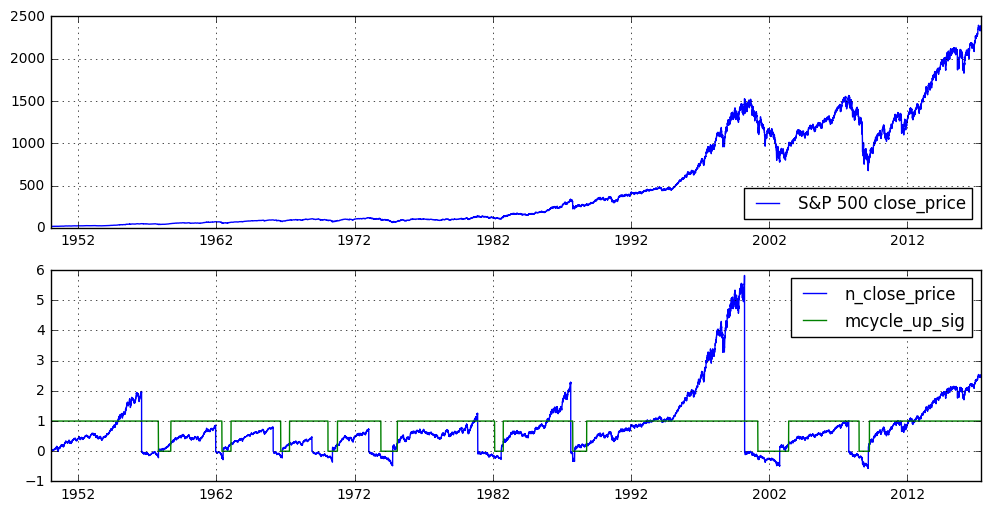

In [277]:

# Market Cycles

%run algosciquant2
compute=0
if compute==1:
    initMarket=1 # market cycle ... ... #  1, 20% .. 1%, 1950
    mcdown_p=19
    mcup_p=24
    mcdp=mcdown_p/100
    mcup=mcup_p/100
    #last_sp_date=dfsp.index[len(dfsp.index)-1]
    #print(last_sp)
    print('\nmcdown =',mcdown_p)
    print('mcup =',mcup_p)
    mudLogic=mudLogic1
    print(" ...")
    (dfmc, dfmcsummary)=marketCycle(dfsp,initMarket,'close_price',mcdp,mcup,mudLogic)
    print(dfmcsummary.tail(10))

    # save market cycle
    save_dfmc_filename='sp500_dfmc'+str(mcdown_p)+str(mcup_p)+'_'+str(dataStartDate.year)+'_'+str(test_et.year)+'-'+str(test_et.month)+'-'+str(test_et.day)+'.csv'
    print('filename =',save_dfmc_filename)
    dfmc2=dfmc.loc[dfmc.index[0]:test_et]
    dfmc2.to_csv(save_dfmc_filename)
   
    # saved files
    #fmc_2025='sp500_dfmc2025_1990_2017-4-28.csv'
    #fmc_1010='sp500_dfmc1010_1990_2017-4-28.csv'
    #fmc_55='sp500_dfmc55_1990_2017-4-28.csv'
    #fmc_2021='sp500_dfmc2021_1990_2017-4-28.csv'

# Load Market Cycle files
read=1
if read ==1:
    mc_filename='./data_jupyter_notebook/sp500_dfmc1924_1950_2017-4-28.csv'
    dfmc_1924_1950 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc195245_1950_2017-4-28.csv'
    dfmc_195245_1950 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc2021_1950_2017-4-28.csv'
    dfmc_2021_1950 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc2023_1950_2017-4-28.csv'
    dfmc_2023_1950 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc2024_1950_2017-4-28.csv'
    dfmc_2024_1950 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc2025_1950_2017-4-28.csv'
    dfmc_2025_1950 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc2026_1950_2017-4-28.csv'
    dfmc_2026_1950 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc2025_1990_2017-4-28.csv'
    dfmc_2025_1990 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc1010_1990_2017-4-28.csv'
    dfmc_1010_1990 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc1013_1990_2017-4-28.csv'
    dfmc_1013_1990 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc1012_1990_2017-4-28.csv'
    dfmc_1015_1990 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    mc_filename='./data_jupyter_notebook/sp500_dfmc57_1990_2017-4-28.csv'
    dfmc_57_1990 = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    
# Plot S&P 500 Market Cycle
rcParams['figure.figsize'] = 12, 6
print("dataStartDate = ",dataStartDate)
print('test_st = ',test_st,', test_et =', test_et)
s=dt.datetime(1950,1,1)
e=test_et
plt.subplot(211)
plt.plot(dfsp.loc[s:e,['close_price']],label='S&P 500 close_price')
plt.legend(loc='lower right');plt.grid(True)
plt.subplot(212)
plt.plot(dfmc_2025_1950.loc[s:e,['mcnr']],label='n_close_price')
plt.plot(dfmc_2025_1950.loc[s:e,['mcupm']],label='mcycle_up_sig')
plt.legend();plt.grid(True)

Truth t_n
            close_price  t_n
2017-04-24  2374.149902   -1
2017-04-25  2388.610107   -1
2017-04-26  2387.449951   -1
2017-04-27  2388.770020   -1
2017-04-28  2384.199951   -1

ML features
Index(['close_pricer', 'volumer', 'close_price', 'sp_volume',
       'high_price_ropen', 'low_price_ropen', 'close_pricer_h1',
       'close_pricer_h2', 'close_pricer_ma5', 'close_pricer_ma10',
       'close_pricer_ma20', 'close_pricer_ma30', 'close_pricer_ma60',
       'close_pricer_ma90', 'close_pricer_ma120', 'volumer_h1', 'volumer_h2',
       'volumer_ma5', 'volumer_ma10', 'volumer_ma20', 'volumer_ma30',
       'volumer_ma60', 'volumer_ma90', 'volumer_ma120', 'vol_y_10', 'vol_y_50',
       'vol_y_120', 'mc2025', 'mcnr2025'],
      dtype='object')
data start date = 1950-01-01 00:00:00 , start date = 1990-01-01 00:00:00 , end date = 2017-04-28 00:00:00
nrows =  16257 null_rows =  0


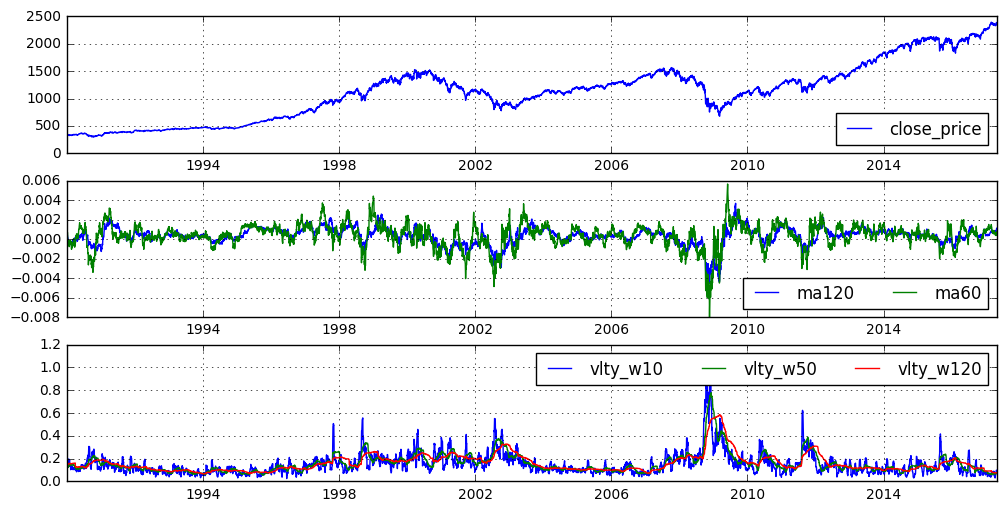

In [332]:
# ML Features and Truth
%run algosciquant

# Truth Variable
nday=43
dfT= ndayTruth(dfsp.loc[dataStartDate:test_et, ['close_price']], nday,tvariable='close_price')
print('Truth t_n')
print(dfT.tail(5))

dfML = pd.DataFrame(index=dfsp.index)
dfML['close_pricer'] = dfsp['close_price'] / dfsp['close_price'].shift(1) - 1
dfML['volumer'] = dfsp['volume'] / dfsp['volume'].shift(1) - 1

# S&P High and Low Relative to Open
dfML['close_price']=dfsp.loc[dataStartDate:test_et,'close_price']
dfML['sp_volume']=dfsp.loc[dataStartDate:test_et,'volume']
dfML['high_price_ropen']=dfsp.loc[dataStartDate:test_et,'high_price']/dfsp['open_price']-1
dfML['low_price_ropen']=dfsp.loc[dataStartDate:test_et,'low_price']/dfsp['open_price']-1

f2p=[2,5,10,20,30,60,90,120]
# Historya nd MA Features
mlHmaFeatures=['close_pricer','volumer']
for mlHmaFeature in mlHmaFeatures:
    x = mlHmaFeature
    # History, history = i
    for i in range(1, f2p[0] + 1):
        dfML[x + '_h' + str(i)] = dfML[x].shift(i)

    # Moving averages, period=i
    for i in f2p[1:len(f2p) + 1]:
        period = i
        dfML[x + '_ma' + str(i)] = (dfML[x].rolling(center=False, min_periods=period, window=period).sum() / period)

# Price Volatility
period=10
dfML['vol_y_10']=np.sqrt(252)*dfML['close_pricer'].rolling(center=False, min_periods=period, window=period).std()
period=50
dfML['vol_y_50']=np.sqrt(252)*dfML['close_pricer'].rolling(center=False, min_periods=period, window=period).std()
period=120
dfML['vol_y_120']=np.sqrt(252)*dfML['close_pricer'].rolling(center=False, min_periods=period, window=period).std()

# Market Cycle
dfML['mc2025']=dfmc_2025_1950.loc[dataStartDate:test_et,'mcupm'].shift(1)
dfML['mcnr2025']=dfmc_2025_1950.loc[dataStartDate:test_et,'mcnr'].shift(1)

print("\nML features")
print(dfML.columns)

s=test_st
e=test_et
#s=dt.datetime(1987,1,1)
#e=dt.datetime(1988,3,1)

print('data start date =',dataStartDate, ', start date =',test_st,', end date =',test_et)   
# plot close_price
plt.subplot(311)
plt.plot(dfML.loc[s:e,['close_price']],label='close_price')
plt.grid(True); plt.legend(loc = 'lower right')

#  plot moving average
plt.subplot(312);  
plt.plot(dfML.loc[s:e,['close_pricer_ma120']],label='ma120')
plt.plot(dfML.loc[s:e,['close_pricer_ma60']],label='ma60')
plt.grid(True); plt.legend(loc = 'lower right', ncol= 2)
plt.subplot(313)
#  plot volatility    
plt.plot(dfML.loc[s:e,['vol_y_10']],label='vlty_w10')
plt.plot(dfML.loc[s:e,['vol_y_50']],label='vlty_w50')
plt.plot(dfML.loc[s:e,['vol_y_120']],label='vlty_w120')
plt.grid(True)
plt.legend(loc = 'upper right',ncol=3)

# Null Rows
s=dt.datetime(1952,6,1)
e=dt.datetime(2017,1,1)
nullrows=sum([True for idx,row in dfML.loc[s:e].iterrows() if any(row.isnull())])
nrows=len(dfML.loc[s:e])
print("nrows = ",nrows,"null_rows = ",nullrows)


In [288]:
#  Training and Prediction
#   for each test date a classifier will be trained until test date - 1

%run algosciquant2

model='DT'
# Create training data frames ... separate into X and Y

X = dfML.loc[train_st:test_et,dfML.columns]
Y = dfT.loc[train_st:test_et]

##### Run the classifier 
dfTR,clf = mClfTrainTest(X,Y,nday,train_st,test_st,test_et,model)

# Print training results
dfTR[['close_price','t' ,'p','t_n','p_n','p_1']].tail(5)

# Volatility and MovingAverage Signal   
mcvariable='mc2025'
vltyw='120'; maw='60'
dfTR=volatilityPriceSP(dfTR,vltyw,maw,mcvariable=mcvariable)
print("vltyw =",vltyw,", maw =",maw)

# Save
tick='sp'
str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)
str_test_styr=str(test_st.year)
save_dtr_filename='dfclfm_'+tick+'_nd'+str(nday)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
print('\nfilename =',save_dtr_filename)
dfTR.to_csv(save_dtr_filename)
print(dfTR.columns)

# Confusion Matrix "p"

(samplesize, errors, correct, er, fn, fp, tp, tn, fnr, fpr, tpr, tnr, dfCMdef, dfCMA, dfCMR)=clfMktConfusionMatrix(dfTR,"t",'p')
print('model =',model)
print('\nerror_rate =',er)
dfCMR[['Totals','Predicted MktDown','Predicted MktUp']]

1990-01-02
1991-01-02
1992-01-02
1993-01-04
1994-01-03
1995-01-03
1996-01-02
1997-01-02
1998-01-02
1999-01-04
2000-01-03
2001-01-02
2002-01-02
2003-01-02
2004-01-02
2005-01-03
2006-01-03
2007-01-03
2008-01-02
2009-01-02
2010-01-04
2011-01-03
2012-01-03
2013-01-02
2014-01-02
2015-01-02
2016-01-04
2017-01-03

vltyw = 120 , maw = 60

filename = dfclfm_sp_nd43_1990_2017428_DT.csv
Index(['close_pricer', 'volumer', 'close_price', 'sp_volume',
       'high_price_ropen', 'low_price_ropen', 'close_pricer_h1',
       'close_pricer_h2', 'close_pricer_ma5', 'close_pricer_ma10',
       'close_pricer_ma20', 'close_pricer_ma30', 'close_pricer_ma60',
       'close_pricer_ma90', 'close_pricer_ma120', 'volumer_h1', 'volumer_h2',
       'volumer_ma5', 'volumer_ma10', 'volumer_ma20', 'volumer_ma30',
       'volumer_ma60', 'volumer_ma90', 'volumer_ma120', 'vol_y_10', 'vol_y_50',
       'vol_y_120', 'mc2023', 'mc1924', 'mc195245', 'mc2025', 'mcnr2025',
       't_n', 'tf', 'p_n', 'train_st', 'train_et', 't',

,Totals,Predicted MktDown,Predicted MktUp
actual MktDown,2362,0.732430,0.267146
actual MktUp,4481,0.201741,0.798259


(0.3, 1)

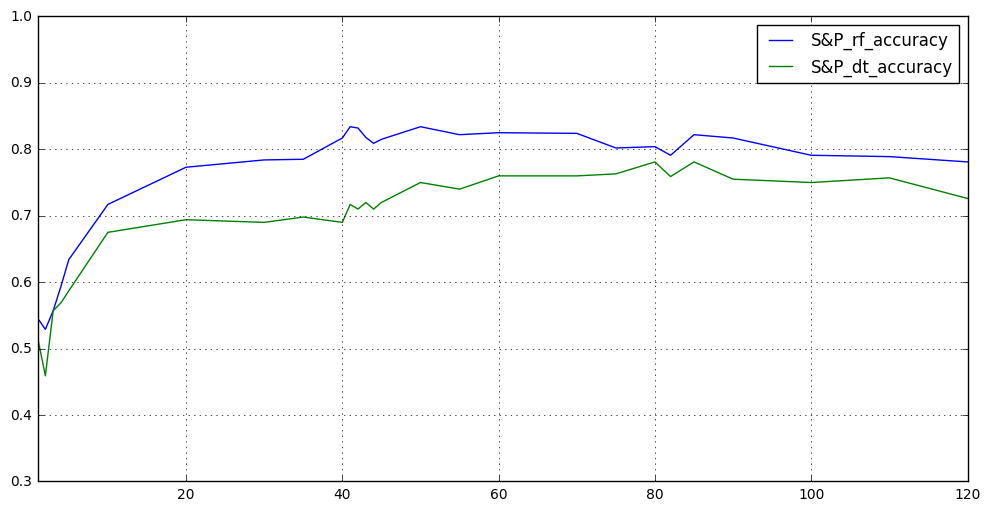

In [376]:
index=[1,2,3,4,5,10,20,30,35,40,41,42,43,44,45, 50, 55,60,70,75,80,82,85,90,100,110,120]
columns=['S&P_dt_error','S&P_dt_price_sp','S&P_rf_error', 'S&P_rf_price_sp']
trainsummary=[(0.483, 2787,0.454, 2744),    # 1, dt, rf
         (0.541,1750,0.4711,2045),          # 2  dt, rf
         (0.443, 2361,0.443,2010),          # 3  dt, rf
         (0.431, 2340,0.406,2410),          # 4  dt, rf
         (0.413, 2122.16,0.366,2430),       # 5  dt, rf
         (0.325, 2071,0.283,1845),          # 10 dt, rf
         (0.306, 2209,0.227,1840),          # 20 dt, rf
         (0.31, 2241,0.216,1774),           # 30 dt, rf
         (0.302, 1792,0.215,1760),          # 35 dt, rf
         (0.31, 1832,0.183,1986.15),        # 40 dt, rf
         (0.283, 1740,0.166,2246),          # 41 dt, rf
         (0.29, 2251,0.168,2265),           # 42 dt, rf
         (0.28, 1879,0.182,2105),           # 43 dt, rf
         (0.29, 2026,0.191,2044),           # 44 dt, rf
         (0.28 ,1773,0.185,1932),           # 45 dt, rf
         (0.25,2021,0.166,1824),            # 50 dt, rf
         (0.26,2101,0.178,2024),            # 55 dt, rf
         (0.24,1755,0.175,1935),            # 60 dt, rf
         (0.24,1952,0.176,2040),            # 70 dt, rf
         (0.237,1952,0.198,1747),           # 75 dt, rf
         (0.219,1935,0.196,1912),           # 80 dt, rf
         (0.241,1935,0.209,1881),           # 82 dt, rf            
         (0.219,2048,0.178,2141),           # 85 dt, rf
         (0.245,1780,0.183,1970),           # 90 dt, rf
         (0.25,1780,0.209,2167),            # 100 dt, rf
         (0.243,1780,0.211,1975),           # 110 dt, rf
         (0.274,1780,0.219,2635)]           # 120 dt, rf

dftrainsummary=pd.DataFrame(trainsummary,columns=columns,index=index)
dftrainsummary['S&P_rf_accuracy']=1-dftrainsummary['S&P_rf_error']
dftrainsummary['S&P_dt_accuracy']=1-dftrainsummary['S&P_dt_error']
dftrainsummary.to_csv('./dftrainsummary.csv') 
dftrainsummary = pd.read_csv('./dftrainsummary.csv',index_col=0,parse_dates=True)
dftrainsummary[['S&P_rf_accuracy','S&P_dt_accuracy']].plot(use_index=True,grid=True)
plt.xlim(1,120)
plt.ylim(0.3,1)
#dftrainsummary[['S&P_rf_accuracy','S&P_dt_accuracy']]

In [297]:
dfTR=dfTR2
dfTR['mc2025']=dfmc_2025_1950.loc[dt.datetime(2000,1,1):test_et,'mcupm'].shift(1)
dfTR['mcnr2025']=dfmc_2025_1950.loc[dt.datetime(2000,1,1):test_et,'mcnr'].shift(1)
save_dtr_filename='dfclfm_'+tick+'_nd'+str(43)+'_'+bt_startyear+'_'+str_test_et+'_'+bt_model+'.csv'
print('\nfilename =',save_dtr_filename)
dfTR.to_csv(save_dtr_filename)


filename = dfclfm_sp_nd43_2000_2017428_RF.csv


...

strategy trade variable =  mc2025pv
start year, 2000 end date, 2017-04-28 00:00:00
model =  RF , nday =  43 , ma =  60 , vltyw =  120
dft filename = dft_sp_nd43_mc2025pv_2000_2017428_RF.csv

Annulized Returns:
                nyear        Rc  Rc_strat        Ra  Ra_strat
2017-04-28  17.334247  0.638378  2.223019  0.028891  0.069846

Backtest Summary:


,end_close_price,end_close_price_SP,return,return_SP
2000,1283.270020,1272.659159,-0.118161,-0.125452
2001,1148.079956,1327.369260,-0.105348,0.042989
2002,879.820007,1246.592916,-0.238033,-0.060854
2003,1111.920044,1464.440447,0.223194,0.174754
2004,1211.920044,1596.144202,0.093317,0.089935
2005,1268.800049,1671.057304,0.055504,0.046934
2006,1416.599976,1865.715357,0.116488,0.116488
2007,1468.359985,1930.981481,0.036538,0.034982
2008,903.250000,1665.559156,-0.375847,-0.137455
2009,1115.099976,2226.681019,0.196716,0.336897


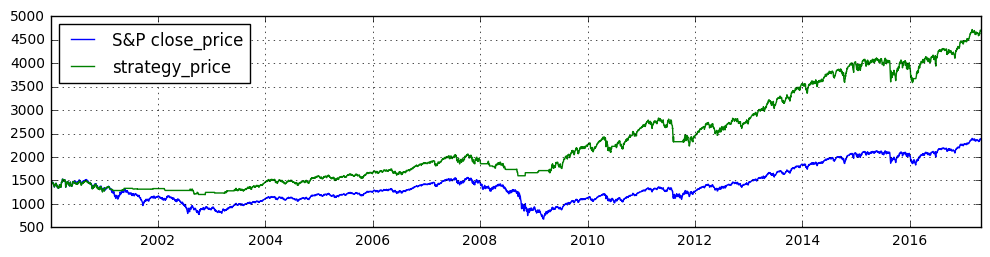

In [375]:
# BackTest
%run algosciquant2

# Strategy Trade
readfile=1
pvariable='mc2025pv' # p, v, pv, mc2025, mc2025v, mc2025pv

# Read File
price_variable='close_price'
if readfile==1:
    bt_model='RF' # RF or DT
    bt_startyear='2000' # 1952 DT, 1970 DT and RF, 1980 DT and RF, 1990 DT and RF, 2000 DT and RF
    bt_test_st=dt.datetime(int(bt_startyear),1,1)
    bt_test_et=dt.datetime(2017,4,28)
    str_test_et=str(bt_test_et.year)+str(bt_test_et.month)+str(bt_test_et.day)
    dfTR_fn='./data_jupyter_notebook/dfclfm_sp_nd43_'+bt_startyear+'_'+str_test_et+'_'+bt_model+'.csv'
    dfTR2 = pd.read_csv(dfTR_fn,index_col=0,parse_dates=True)
    bt_nday=43;bt_vltyw=120; bt_maw=60;
else:
    bt_test_st=test_st
    bt_test_et=test_et
    bt_model=model;bt_nday=nday; bt_vltyw=vltyw; bt_maw=maw; bt_startyear=str(test_st.year)
    dfTR2=dfTR

print('...')
# Backtest
ticker='sp'
dft=tradeReturns(dfTR2,price_variable)
dft=strategyTrade(dft,price_variable,price_variable+'_R',pvariable)
(dftsummary,dfreturns)=backTestSummary(dft,price_variable,bt_test_st,bt_test_et)

# Save File

ticker='sp'
str_test_styr=str(test_st.year)
str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)
save_dft_filename='dft_'+ticker+'_nd'+str(bt_nday)+'_'+str(pvariable)+'_'+bt_startyear+'_'+str_test_et+'_'+bt_model+'.csv'
dft.to_csv(save_dft_filename)


# Plot Results
s=bt_test_st
e=bt_test_et
#s=dt.datetime(1980,1,1)

plt.subplot(211)
plt.plot(dft.loc[s:e,['close_price']],label='S&P close_price')
plt.plot(dft.loc[s:e,['close_price_SP']],label='strategy_price')
plt.legend(loc='upper left');plt.grid(True)

# Print Results
print('\nstrategy trade variable = ',pvariable)
print('start year,',bt_startyear,'end date,',test_et)    
print('model = ',bt_model,', nday = ',bt_nday,', ma = ',bt_maw,', vltyw = ',bt_vltyw)
print('dft filename =',save_dft_filename)

print("\nAnnulized Returns:")
print(dfreturns[[ 'nyear',  'Rc' ,  'Rc_strat','Ra','Ra_strat']])
print("\nBacktest Summary:")
dftsummary[['end_close_price','end_close_price_SP','return','return_SP']]


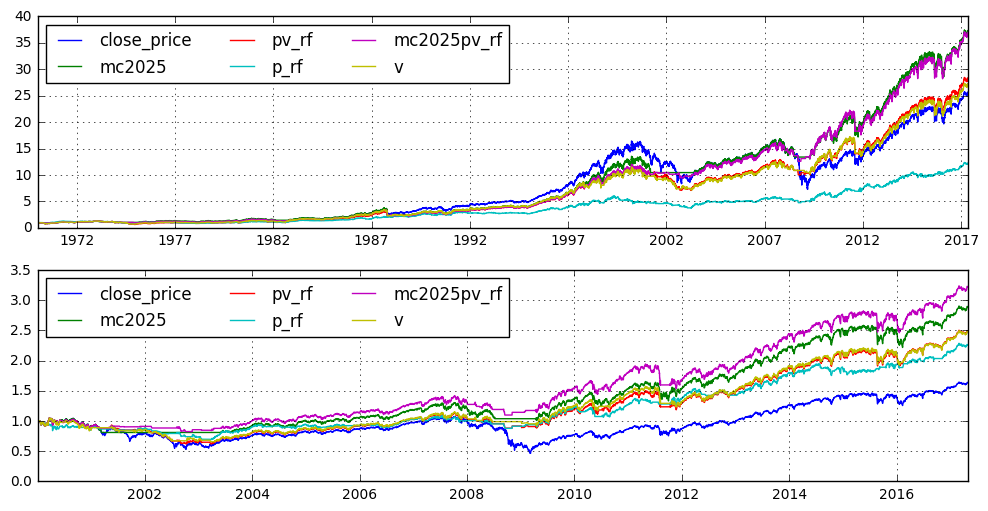

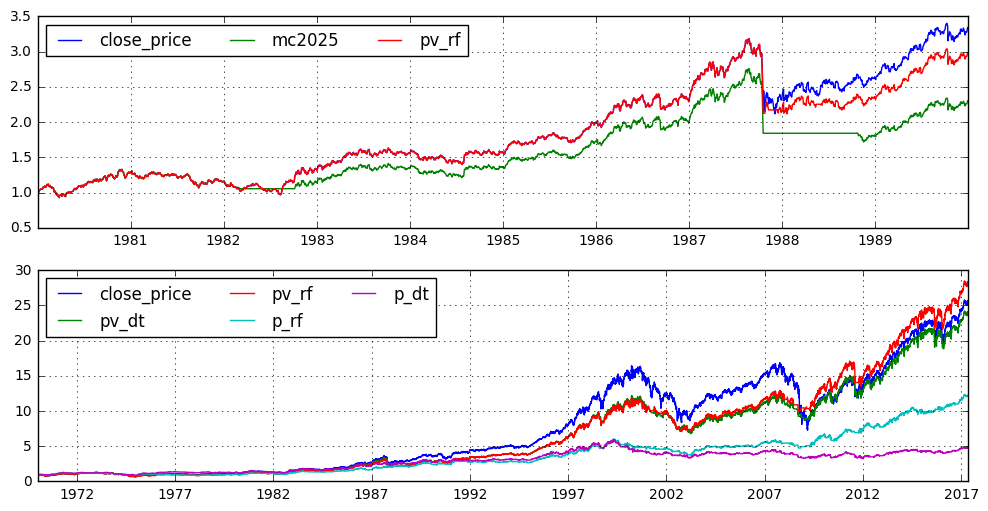

In [368]:
# Graph Summaries
%run algosciquant2

s = dt.datetime(1970,1,1)
e = dt.datetime(2017,4,28)
s=dt.datetime(int(g_startyear),1,1)
#e =dt.datetime(1989,12,31)


# Graph Results
g_startyear='1970' # 1970, 1980, 1990, 2000
files1=[
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_mc2025_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_RF.csv',
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_RF.csv',  
 './data_jupyter_notebook/dft_sp_nd43_mc2025pv_'+g_startyear+'_2017428_RF.csv',
 './data_jupyter_notebook/dft_sp_nd43_v_'+g_startyear+'_2017428_DT.csv'
]

lnames1=['close_price','mc2025' ,'pv_rf','p_rf','mc2025pv_rf','v']
price_variable='close_price'
dftn,lnames=dftn_from_files(s,e,files1,price_variable,lnames1) 


# plot 1
fig = plt.figure()
f1 = fig.add_subplot(211)
f1.plot(dftn[lnames1[0]],label=lnames1[0])
f1.plot(dftn[lnames1[1]],label=lnames1[1])
f1.plot(dftn[lnames1[2]],label=lnames1[2])
f1.plot(dftn[lnames1[3]],label=lnames1[3])
f1.plot(dftn[lnames1[4]],label=lnames1[4])
f1.plot(dftn[lnames1[5]],label=lnames1[5])
f1.grid(True)
f1.legend(loc='upper left',ncol=3)

# plot 2
s=dt.datetime(2000,1,1)
e=dt.datetime(2017,4,28)
dftn,lnames1=dftn_from_files(s,e,files1,price_variable,lnames1) 
f2 = fig.add_subplot(212)
f2.plot(dftn[lnames1[0]],label=lnames1[0])
f2.plot(dftn[lnames1[1]],label=lnames1[1])
f2.plot(dftn[lnames1[2]],label=lnames1[2])
f2.plot(dftn[lnames1[3]],label=lnames1[3])
f2.plot(dftn[lnames1[4]],label=lnames1[4])
f2.plot(dftn[lnames1[5]],label=lnames1[5])
f2.grid(True)
f2.legend(loc='upper left',ncol=3)

# plot 3
s=dt.datetime(1980,1,1)
e=dt.datetime(1989,12,31)

fig2 = plt.figure()
f3 = fig2.add_subplot(211)
files3=[
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_mc2025_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_RF.csv' 
]
lnames3=['close_price','mc2025','pv_rf']
dftn,lnames3=dftn_from_files(s,e,files3,price_variable,lnames3) 

f3.plot(dftn[lnames3[0]],label=lnames3[0])
f3.plot(dftn[lnames3[1]],label=lnames3[1])
f3.plot(dftn[lnames3[2]],label=lnames3[2])
f3.grid(True)
f3.legend(loc='upper left',ncol=3)

# plot 4
s = dt.datetime(1970,1,1)
e = dt.datetime(2017,4,28)
files4=[
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_RF.csv',  
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_RF.csv',
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv'
]

lnames4=['close_price','pv_dt','pv_rf','p_rf','p_dt']
dftn,lnames4=dftn_from_files(s,e,files4,price_variable,lnames4) 

f4 = fig2.add_subplot(212)
f4.plot(dftn[lnames2[0]],label=lnames2[0])
f4.plot(dftn[lnames2[1]],label=lnames2[1])
f4.plot(dftn[lnames2[2]],label=lnames2[2])
f4.plot(dftn[lnames2[3]],label=lnames2[3])
f4.plot(dftn[lnames2[4]],label=lnames2[4])
f4.grid(True)
f4.legend(loc='upper left',ncol=3)



## References

- Find stocks, [Kiplinger 8 Stocks](http://www.kiplinger.com/slideshow/investing/T052-S003-8-stocks-to-buy-now-for-2017/index.html)

- Kiplingers, "10 Great Stocks for the Next 10 Years", December 2016,   PNRA, ADBE, DHR, FBHS, IDXX, LGF

- Kiplingers, "8 Stocks to buy for now", Jan 2017, GOOG, CMD, AAPL, MEDP

- Kiplingers, "My Top Stock Picks for 2017," Jan 2017, AMZN, CVU, SBUX, CRM

- Other stocks, BRK.B, ^GSPC, KO

- Stanford ML CS229 Trend Stock Prediction,  [Stanford CS229 ML Stock Prediction](http://cs229.stanford.edu/proj2013/DaiZhang-MachineLearningInStockPriceTrendForecsting.pdf) ... **ML Features** PE ratio, PX volume, PX ebitda, current enterprise value, 2-day net price change, 10-day volatility, 50-day moving average, 10-day moving average, quick ratio, alpha overridable, alpha for beta pm, beta raw overridable, risk premium, IS EPS, and corresponding S&P 500 index
- CS229 Stock Prediction Feature Selection, ...  http://cs229.stanford.edu/proj2014/Xinjie%20Di,%20Stock%20Trend%20Prediction%20with%20Technical%20Indicators%20using%20SVM.pdf  ... 

- Stanford ML CS229 Text/Article Stock Prediction, [CS229 Bryce Taylor](http://cs229.stanford.edu/proj2013/Taylor-Applying%20Machine%20Learning%20to%20Stock%20Market%20Trading.pdf)
    
- Stock correlations, [Asset Correlations](https://www.portfoliovisualizer.com/asset-correlations)
    
- Example noteboek, [Python Clustering](http://brandonrose.org/clustering)

- Where to get financial data, Quroa - Intrinio, <https://www.quora.com/What-are-some-cheaper-alternatives-to-Bloomberg-data-terminal>

- Intrino, <https://intrinio.com> ... <http://blog.intrinio.com/intrinio-financial-data-in-r-and-rstudio/>  ... API  <http://blog.intrinio.com/stock-api-developers/> ...  <http://docs.intrinio.com>  ... Python Github https://github.com/nhedlund/intrinio .... http://docs.intrinio.com/tags/intrinio-public#data-point .... Converasation with Andrew Carpenter, Intrinio.com ... What I used R for, which I bet you can do better in Python, is to pull in historical prices and then a vector of historical explainatory variables on the same time period. I automated it, and filled forward the quarterly data to match the daily data. Which is the standard in the industry, I learn from my professors. So that gives you a nice clean data frame with as many explainatory variables as you want- valuation metrics, earnings, economic indicators like SPY and VIX. acarpenter@intrinio.com 727-331-3416. ... from the API page  <http://blog.intrinio.com/stock-api-developers/>  good info plus make sure to watch the video. Entire price history using "price" endpoint "https://inntrinio.com/prices?ticker=AAPL" includes 13 data points open, close, adj_high, ... volume  ... use datapoint function to pull in specific data points "https://inntrinio.com/datapoint?ticker=AAPL&item=close_price" ... use the "historical_data" endpoint to pull in time-series "https://inntrinio.com/historical_data?ticker=AAPL&item=pricetoearnings&start_date=2014-01-01&end_date_2015-01-01" ... you can also add in a frequency as "&frequency=yearly"   (yearly, quarterly, monthly, weekly, daily) ... or just the start_date ... **Historical Data Features**  <http://docs.intrinio.com/tags/intrinio-public#historical-data> ... **Modeling financial data in R** ... http://blog.intrinio.com/modeling-financial-data-in-r-with-intrinio/